# 주제 : 2023년 Dacon 대회 평균 참여자 수 및 게시판 활성도에 대한 통계분석

# 목차
1. 기초 세팅
    - 1] 라이브러리 호출
    - 2] 데이터 불러오기 및 확인
2. 변수 간 관계 분석(수치-수치 데이터 분석), 피어슨 상관분석
    - 1] "참여자 수"는 "토론 활성도"에 영향을 주는가?
    - 2] 대회의 "진행기간(=시작시간과 종료시간 활용하여 새로운 컬럼 생성)"과 "참여자 수"는 상관관계가 있는가?
    - 3] "참여자 수", "최대팀원 수", "수상자 수", "일일 제출횟수"는 상관 관계가 있는가?
    - 4] "참여자 수", "상금정보"는 상관 관계가 있는가?
    - 5] '코드 공유 수', '댓글 수', '공유 수', '다운로드 수', '좋아요 수', '조회 수'는 상관 관계가 있는가?
3. 키워드 비중  
    - 1] 차트를 그려서 시각적으로 비중 확인
    - 2]. 차트를 그려서 시각적으로 갯수 확인
5. 범주-수치 분석, t 검정, ANOVA 검정
    - 1] 문제 유형은 참여자수에 영향을 주는가
    - 2] 평가 방법은 참여자수에 영향을 주는가
    - 3] 참가 조건 여부, 연습 가능 여부는 참여자수에 영향을 주는가
6. 군집분석
    - 1] codeshare_log_df
    - 2] competition_info_df
    - 3] talk_log_df
7. 최종 결론

## <span style="font-style:normal; font-weight:bold;font-family:normal; font-size:1em;line-height:1.5em;">1. 기초 세팅</span>

### 1-(1) 라이브러리 호출

In [2]:
import seaborn as sns
from datetime import datetime
import pandas as pd
# ipynb Notebook에 경고 표시를 무시합니다.
import warnings
warnings.filterwarnings(action='ignore')

import scipy.stats as spst

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family']

import seaborn as sns

In [3]:
import os
print(os.listdir())
print(os.getcwd())

['.ipynb_checkpoints', '2023년 Dacon 대회 평균 참여자 수 및 게시판 활성도에 대한 통계분석.ipynb', '2023년 Dacon 대회 평균 참여자 수 및 게시판 활성도에 대한 통계분석.zip', '2023년 Dacon 대회 평균 참여자 수 및 게시판 활성도에 대한 통계분석_240706_1016.ipynb', '2023년 Dacon 대회 평균 참여자 수 및 게시판 활성도에 대한 통계분석_240720_1927.ipynb', 'README.md', '정리.txt']
c:\Users\meo47\OneDrive\프로젝트\Public_DACON_CompetitonData\Code


### 1-(2). 데이터 불러오기 및 확인
- 데이터 불러오기
- competition_info.csv : 데이콘에서 진행된 공개 AI 경진대회 관련 메타 정보
- codeshare_log.csv : 특정 대회에서 발생한 코드 공유 관련 정보
- participate_log.csv : 특정 대회에서 발생한 참가자 수 관련 정보
- submission_log.csv : 특정 대회에서 발생한 제출 수 관련 정보
- talk_log.csv : 특정 대회에서 발생한 토크 관련 정보

In [4]:
competition_info_df = pd.read_csv('../open/competition_info.csv')
participate_log_df = pd.read_csv('../open/participate_log.csv')
submission_log_df = pd.read_csv('../open/submission_log.csv')
talk_log_df = pd.read_csv('../open/talk_log.csv')
codeshare_log_df = pd.read_csv('../open/codeshare_log.csv')

In [5]:
# 간단하게 데이터 확인
display(competition_info_df.head(2))
# display(participate_log_df.head(5))
# display(submission_log_df.head(5))
# display(talk_log_df.head(5))
# display(codeshare_log_df.head(5))

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,평가산식,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,RMSE,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구..."
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,RMSE,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ..."


## 2. 변수 간 관계 분석(수치-수치 데이터 분석)

### 2-(1) "참여자 수"는 "토론 활성도"에 영향을 주는가?

In [6]:
display(participate_log_df.head(5))
display(talk_log_df.head(5))

,ID,일자,참가자 수
0,ID_000,2018-08-31,1
1,ID_001,2018-11-14,1
2,ID_001,2018-12-01,1
3,ID_002,2019-02-11,2
4,ID_002,2019-02-18,1


,ID,일자,토크 수,댓글 수,조회 수,공유 수,좋아요 수
0,ID_000,2018-08-16,1,1,2324,0,5
1,ID_000,2018-08-17,2,2,4729,0,9
2,ID_000,2018-08-21,5,5,9475,0,14
3,ID_000,2018-08-25,6,6,11862,0,18
4,ID_000,2018-08-27,11,11,22621,0,34


In [7]:
participate_log_df['일자'] = pd.to_datetime(participate_log_df['일자'])
participate_log_df['월별'] = participate_log_df['일자'].dt.to_period('M')
participate_log_df['월별'] = participate_log_df['월별'].astype(str)
participate_log_df.drop(['ID','일자'], axis = 1, inplace = True)

talk_log_df['일자'] = pd.to_datetime(talk_log_df['일자'])
talk_log_df['월별'] = talk_log_df['일자'].dt.to_period('M')
talk_log_df['월별'] = talk_log_df['월별'].astype(str)

talk_log_df.drop(['ID','일자'], 
                 axis = 1, inplace = True)

In [8]:
display(participate_log_df.head(5))
display(talk_log_df.head(5))

,참가자 수,월별
0,1,2018-08
1,1,2018-11
2,1,2018-12
3,2,2019-02
4,1,2019-02


,토크 수,댓글 수,조회 수,공유 수,좋아요 수,월별
0,1,1,2324,0,5,2018-08
1,2,2,4729,0,9,2018-08
2,5,5,9475,0,14,2018-08
3,6,6,11862,0,18,2018-08
4,11,11,22621,0,34,2018-08


,월별,참가자 수,댓글 수,조회 수,공유 수,좋아요 수
51,2023-05,28.066116,55.224138,17675.275862,9.517241,167.224138
53,2023-07,26.482759,67.263158,19446.982456,5.771930,102.964912
49,2023-03,25.750000,82.419355,27047.903226,5.193548,168.000000


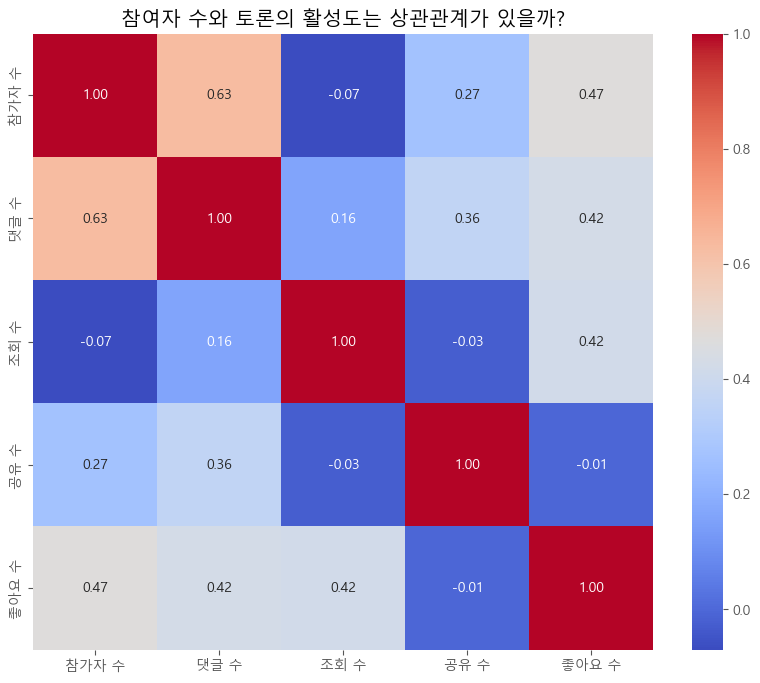

{'댓글 수': 1.1755456562840462e-07, '조회 수': 0.5965095124137927, '공유 수': 0.04262845724914294, '좋아요 수': 0.00019181711327753877}


In [9]:
group_participate = participate_log_df.groupby(by = '월별', # 월별 평균 참여자수를 확인
                                               as_index = False)['참가자 수'].mean() 

group_talk = talk_log_df.groupby(by = '월별', # 월별 대회 게시판 정보 확인
                                 as_index = False)[['댓글 수', '조회 수', '공유 수', '좋아요 수']].mean()

group_part_talk = pd.merge(group_participate, group_talk, # 위 두 정보를 결합
                           on='월별', how='inner')

display(group_part_talk.sort_values(by = '참가자 수',
                                    ascending = False).head(3))

relation = {}

# 상관관계 히트맵 생성
group_part_talk_matrix = group_part_talk[['참가자 수','댓글 수', '조회 수', '공유 수', '좋아요 수']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(group_part_talk_matrix, 
            annot=True, cmap='coolwarm', fmt='.2f')

plt.title('참여자 수와 토론의 활성도는 상관관계가 있을까?')
plt.show()


target = '참가자 수'
analyze_list = ['댓글 수', '조회 수', '공유 수', '좋아요 수']

for feature in analyze_list:
    # print(f"{target} : {feature}")
    # display(spst.pearsonr(group_part_talk[target], # 피어슨 상관계수 정보 계산
    #                       group_part_talk[feature]))
    relation[feature] = spst.pearsonr(group_part_talk[target], # 피어슨 상관계수 정보 딕셔너리에 저장
                                      group_part_talk[feature])[1]

print(relation)

- p-value 값을 분석하면

    - "댓글 수" pvalue=1.1755456562840462e-07 ( = 참여자 수는 댓글 수와 상관관계가 존재한다. )

    - "조회 수" pvalue=0.5965095124137927 ( = 참여자 수는 조회 수와 상관관계가 미미하다. )

    - "공유 수" pvalue=0.04262845724914294 ( = 참여자 수는 공유 수와 상관관계가 미약하게 존재한다. )

    - "좋아요 수" pvalue=0.00019181711327753877 ( = 참여자 수는 좋아요 수와 상관관계가 존재한다. )
    

### 2-(2) 대회의 "진행기간(=시작시간과 종료시간 활용하여 새로운 컬럼 생성)"과 "참여자 수"는 상관관계가 있는가?
- 1. 진행기간 컬럼 추가
- 2. timedelta 형식에서 days만 추출
- 3. 피어슨 상관분석을 수행, p-value 값을 통해 상관관계 확인

In [10]:
competition_info_df['진행기간'] = pd.to_datetime(competition_info_df['종료시간']) - pd.to_datetime(competition_info_df['시작시간'])
competition_info_df.head(2)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,진행기간
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,...,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구...",30 days
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,...,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ...",74 days


In [11]:
# timedelta 형식에서 days만 추출
competition_info_df['진행기간'] = competition_info_df['진행기간'].apply(lambda x: x.days)

진행기간


PearsonRResult(statistic=0.09886800193529112, pvalue=0.23028868803509195)

진행기간과 참여자 수는 상관관계가 미미하다.


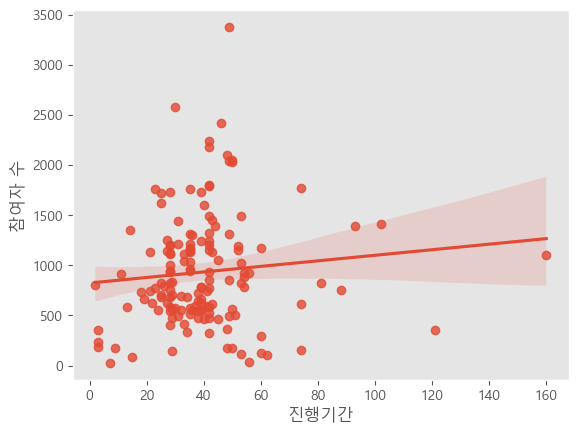

In [39]:
# 상관관계 분석
target = '참여자 수'
analyze = ['진행기간']

for feature in analyze:    
    print(f"{feature}")
    result = spst.pearsonr(competition_info_df[feature], 
                           competition_info_df[target])
    display(result)

    if result[1] > 0.05:
        print(f"{feature}과 {target}는 상관관계가 미미하다.")
        
    else:
        print(f"{feature}과 {target}에 상관관계가 존재한다.")
        
    sns.regplot(x= feature, 
                y = target, 
                data = competition_info_df )
    plt.grid()
    plt.show()

- "참가자 수  : 진행기간" pvalue=0.23028868803509195 ( = 진행 기간은 참여자 수에 주는 영향이 미미하다. )

### 2-(3) "참여자 수", "최대팀원 수", "수상자 수", "일일 제출횟수"는 상관 관계를 갖는가?

참여자 수, 최대팀원 수, 수상자 수는 상관 관계를 갖는가?

최대 팀원 수


PearsonRResult(statistic=0.045080049972553785, pvalue=0.5851240251938453)

최대 팀원 수는 참여자 수에 영향을 주지 않는다.


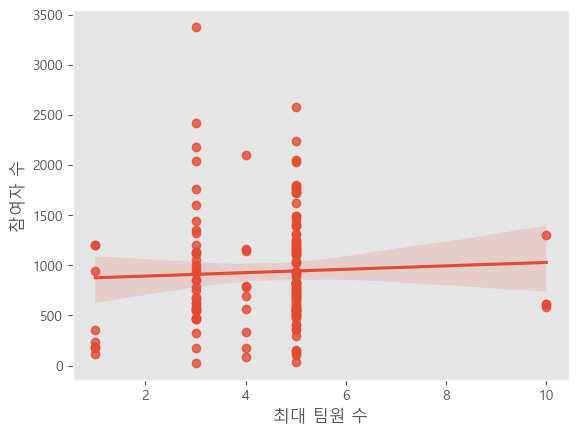

수상자 수


PearsonRResult(statistic=0.03426699351052273, pvalue=0.6782289088401827)

수상자 수는 참여자 수에 영향을 주지 않는다.


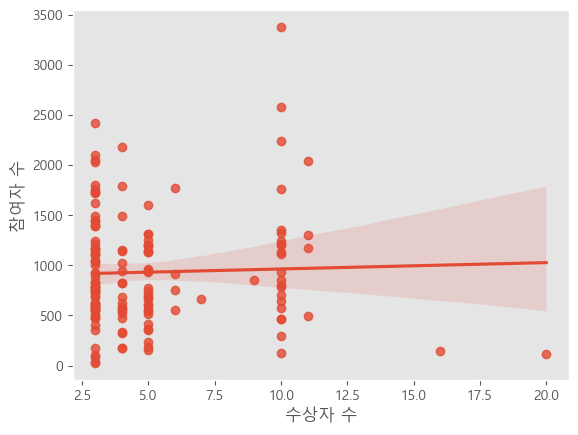

일일 제출횟수


PearsonRResult(statistic=-0.2356772414644827, pvalue=0.0038103281590203394)

일일 제출횟수는 참여자 수에 영향을 준다.


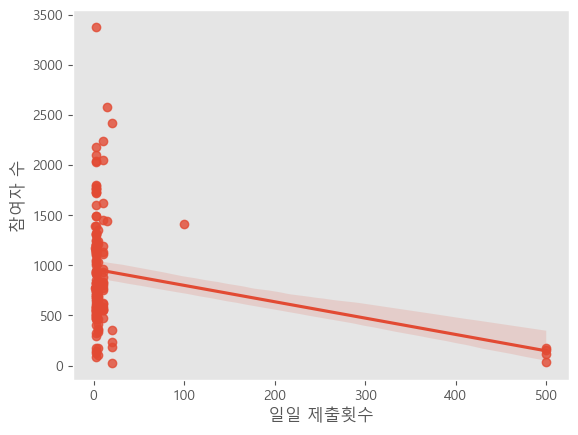

In [13]:
target = '참여자 수'

analyze = ['최대 팀원 수', '수상자 수', '일일 제출횟수']

for feature in analyze:
    
    print(f"{feature}")
    result = spst.pearsonr(competition_info_df[feature], competition_info_df[target])
    display(result)

    if result[1] > 0.05:
        print(f"{feature}는 {target}에 영향을 주지 않는다.")
        
    else:
        print(f"{feature}는 {target}에 영향을 준다.")
        
    sns.regplot( x= feature, y = target, data = competition_info_df )
    plt.grid()
    plt.show()

p-value 값을 분석하면

- "최대 팀원 수" pvalue=0.5851240251938453 ( = 최대 팀원 수는 참여자 수는 상관관계가 미미하다. )

- "수상자 수" pvalue=0.6782289088401827 ( = 수상자 수는 참여자 수는 상관관계가 미미하다. )

- "일일 제출횟수" pvalue=0.0038103281590203394 ( = 일일 제출횟수는 참여자 수와 상관관계가 존재한다.)



### 2-(4) '코드 공유 수', '댓글 수', '공유 수', '다운로드 수', '좋아요 수', '조회 수'는 상관 관계를 갖는가?</span>

코드 공유 수


PearsonRResult(statistic=0.8016798228920092, pvalue=0.0)

코드 공유 수와 조회 수는 상관관계가 존재한다.


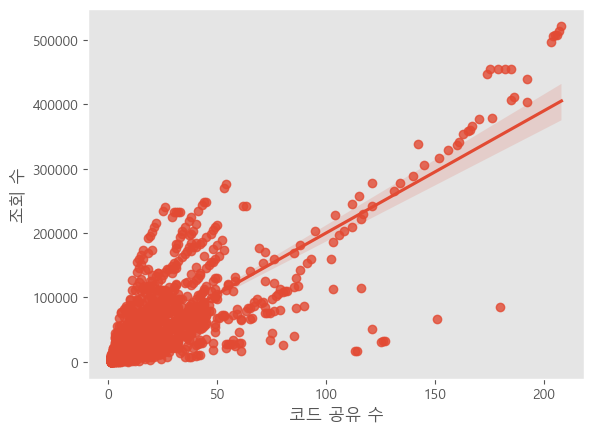

댓글 수


PearsonRResult(statistic=0.6606422222397115, pvalue=1.1095692399390887e-226)

댓글 수와 조회 수는 상관관계가 존재한다.


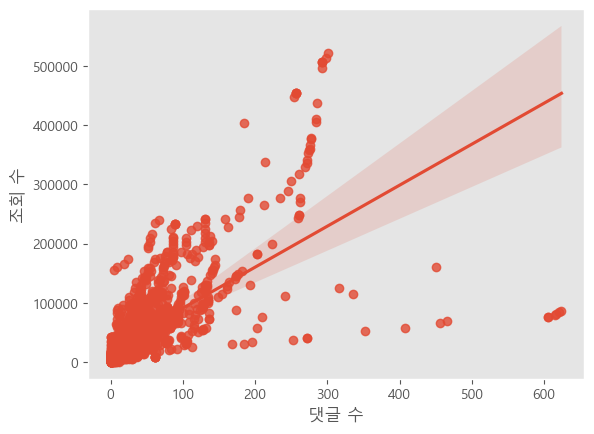

공유 수


PearsonRResult(statistic=0.41065978524654556, pvalue=2.4471258590996577e-74)

공유 수와 조회 수는 상관관계가 존재한다.


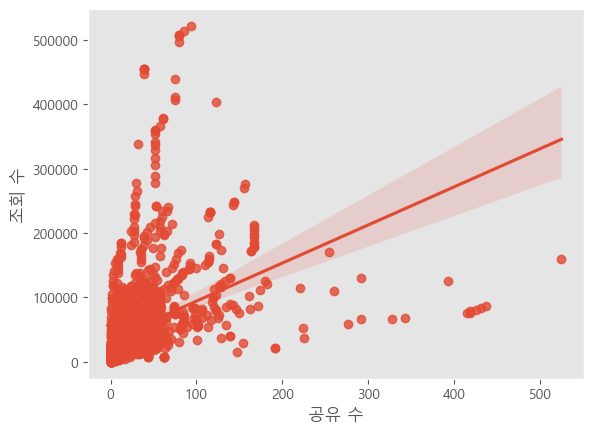

다운로드 수


PearsonRResult(statistic=-0.011144307926176232, pvalue=0.6361956258160091)

다운로드 수와 조회 수는 상관관계가 미미하다.


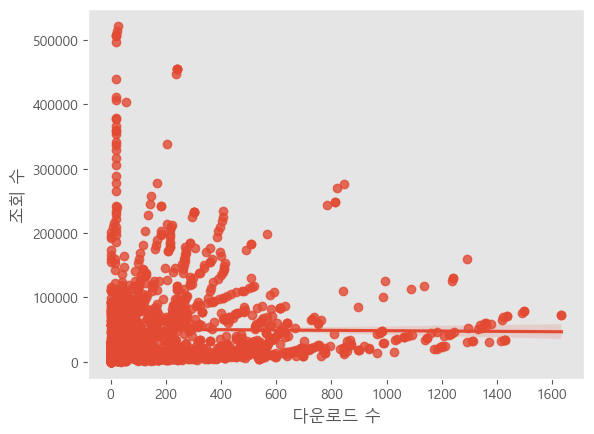

좋아요 수


PearsonRResult(statistic=0.6983296613644847, pvalue=5.475059889116603e-264)

좋아요 수와 조회 수는 상관관계가 존재한다.


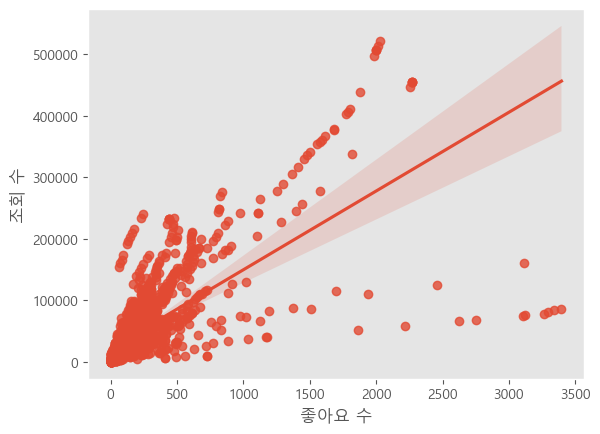

In [40]:
target = '조회 수'

analyze = ['코드 공유 수', '댓글 수', '공유 수', '다운로드 수', '좋아요 수']

for feature in analyze:
    
    print(f"{feature}")
    result = spst.pearsonr(codeshare_log_df[feature], 
                           codeshare_log_df[target])
    display(result)

    if result[1] > 0.05:
        print(f"{feature}와 {target}는 상관관계가 미미하다.")
        
        
    else:
        print(f"{feature}와 {target}는 상관관계가 존재한다.")
        
    sns.regplot(x= feature, 
                y = target, 
                data = codeshare_log_df )
    plt.grid()
    plt.show()

상관관계 존재한다.
- 코드 공유 수와 조회 수는 상관관계가 존재한다. pvalue=0.0 ( 매우 작은 값으로 나타남 )

- 댓글 수와 조회 수는 상관관계가 존재한다. pvalue=1.1095692399390887e-226

- 공유 수는 조회 수와 상관관계가 존재한다. pvalue=2.4471258590996577e-74

- 좋아요 수는 조회 수와 상관관계가 존재한다. pvalue=5.475059889116603e-264

상관관계 미미하다.
- 다운로드 수는 조회 수와 상관관계가 미미하다. pvalue=0.6361956258160091


----  
1. 변수 간에 상관 관계 존재 

    - "참여자 수"와 "댓글 수" pvalue=1.1755456562840462e-07 ( = 참여자 수는 댓글 수와 상관관계가 존재한다. )
    - "참여자 수"와 "좋아요 수" pvalue=0.00019181711327753877 ( = 참여자 수는 좋아요 수와 상관관계가 존재한다. )
    - "참여자 수"와 "일일 제출횟수" pvalue=0.0038103281590203394 ( = 일일 제출횟수는 참여자 수와 상관관계가 존재한다.)
    - "조회 수"와 "코드 공유 수" pvalue=0.0(매우 작은 값으로 나타남) ( = 조회 수는 코드 공유 수와 상관관계가 존재한다. )
    - "조회 수"와 "댓글 수" pvalue=1.1095692399390887e-226 ( = 조회 수와 댓글 수는 상관관계가 존재한다. )
    - "조회 수"와 "공유 수" pvalue=2.4471258590996577e-74 ( = 조회 수와 공유 수는 상관관계가 존재한다. )
    - "조회 수"와 "좋아요 수" pvalue=5.475059889116603e-264 ( = 조회 수는 좋아요 수와 상관관계가 존재한다. )

----
2. 변수 간에 상관 관계 미미
    - "참여자 수"와 "조회 수" pvalue=0.5965095124137927 ( = 조회 수는 참여자 수와 상관관계가 미미하다. )
    - "참여자 수"와 "공유 수" pvalue=0.04262845724914294 ( = 공유 수는 참여자 수와 상관관계가 미미하다. )
    - "참여자 수"와 진행기간" pvalue=0.23028868803509195 ( = 진행 기간은 참여자 수와 상관관계가 미미하다. )
    - "참여자 수"와 "최대 팀원 수" pvalue=0.5851240251938453 ( = 최대 팀원 수는 참여자 수와 상관관계가 미미하다. )
    - "참여자 수"와 "수상자 수" pvalue=0.6782289088401827 ( = 수상자 수는 참여자 수와 상관관계가 미미하다. )
    - "조회 수"와 "다운로드 수" pvalue=0.6361956258160091( = 다운로드 수는 조회 수와 상관관계가 미미하다.)


## <span style="font-style:normal; font-weight:bold;font-family:normal; font-size:1em;line-height:1.5em;">3. 키워드 비중</span>

### <span style="font-style:normal; font-weight:bold;font-family:normal; font-size:1em;line-height:1.5em;">3-(1). 차트를 그려서 시각적으로 비중 확인</span>

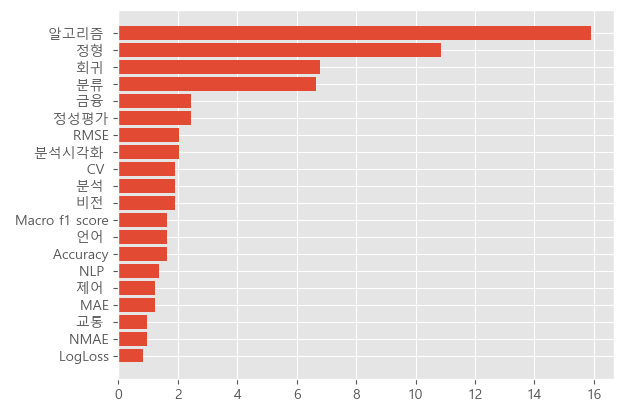

In [15]:
keywords = competition_info_df['키워드'].str.split('|').explode() # 알고리즘 | 정형 | 회귀 | 금융 | RMSE 에서 요소들을 하나씩 분리
keywords_ratio = round(keywords.value_counts().head(20) / len(keywords),5)*100
keywords_ratio = keywords_ratio.sort_values()
plt.barh(keywords_ratio.index, width =keywords_ratio)
plt.show()

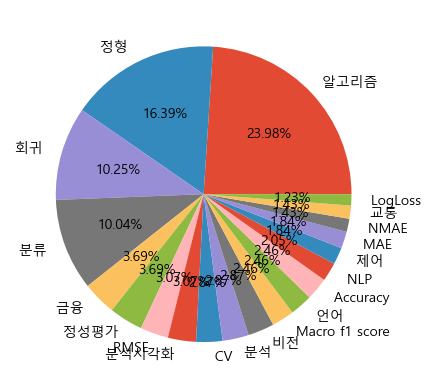

In [16]:
# plt.figure(figsize = (10,10))
keywords_ratio = keywords_ratio.sort_values(ascending = False)
plt.pie(keywords_ratio, labels =keywords_ratio.index, autopct = '%.2f%%')
plt.show()

### <span style="font-style:normal; font-weight:bold;font-family:normal; font-size:1em;line-height:1.5em;">3-(2). 차트를 그려서 시각적으로 갯수 확인</span>

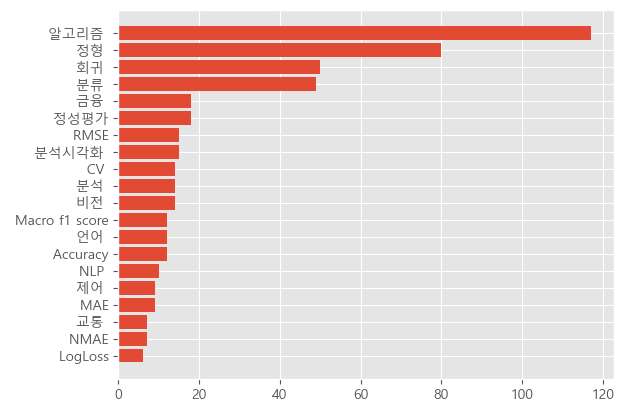

In [17]:
keywords = competition_info_df['키워드'].str.split('|').explode() # 알고리즘 | 정형 | 회귀 | 금융 | RMSE 에서 요소들을 하나씩 분리
keywords_ratio = keywords.value_counts().head(20)
keywords_ratio = keywords_ratio.sort_values()
plt.barh(keywords_ratio.index, width =keywords_ratio)
plt.show()

## 4. 범주-수치 분석, t 검정, ANOVA 검정

### 4-(1) 문제 유형에 따라 참여자 숫자의 차이가 존재하는가

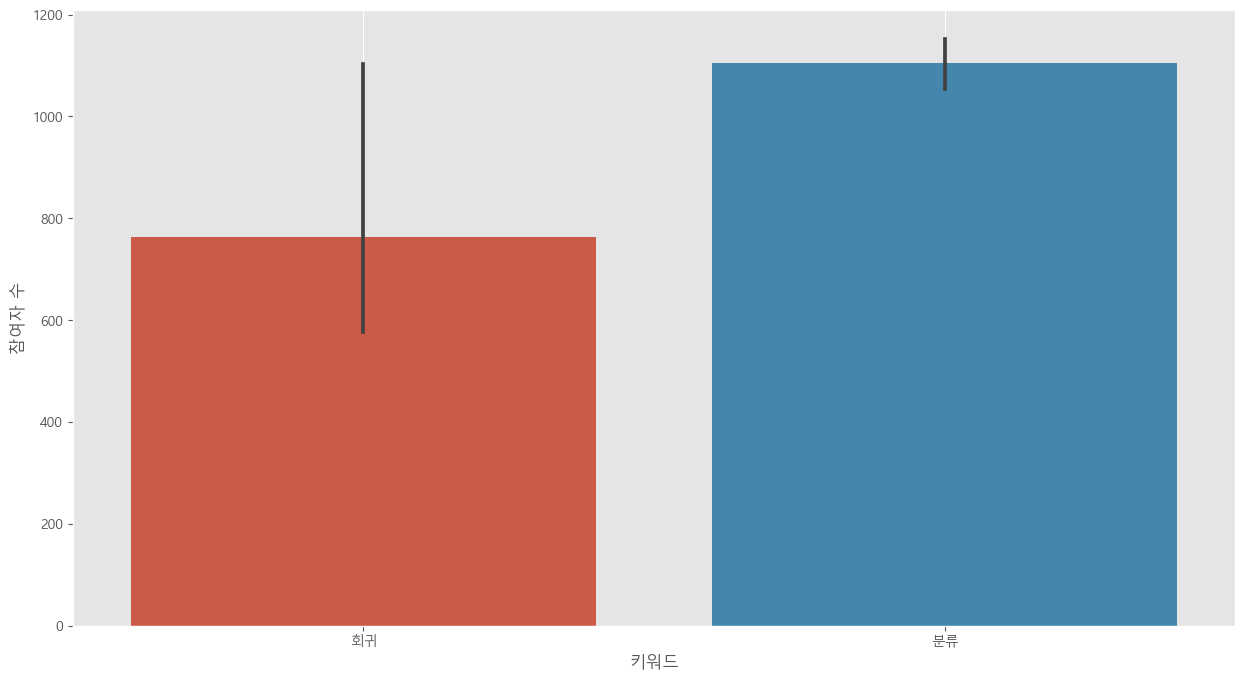

TtestResult(statistic=-1.9845641374180085, pvalue=0.11818292027737212, df=4.0)

In [18]:
group_regression = competition_info_df.loc[competition_info_df['키워드'].str.contains("회귀"),:].head(3)
group_classify = competition_info_df.loc[competition_info_df['키워드'].str.contains("분류"),:].head(3)
 
group_regression['키워드'] = '회귀'
# display(group_regression.head(5))
group_classify['키워드'] = '분류'
# display(group_classify.head(5))
 
group_regression_classify = pd.merge(group_regression,group_classify ,how = 'outer')
group_regression_classify.head(5)
 
plt.figure(figsize = (15,8))
sns.barplot(x='키워드', y='참여자 수', data = group_regression_classify)
plt.grid()
plt.show()
 
## 평균 분석 : ttest_ind
 
t_regression = group_regression_classify.loc[group_regression_classify['키워드']=='회귀', '참여자 수']
t_classify = group_regression_classify.loc[group_regression_classify['키워드']=='분류', '참여자 수']
 
display(spst.ttest_ind(t_regression, t_classify))

- 1. bar chart에서 시각적으로는 차이를 확인 가능
- 2. t 검정 진행 결과 pvalue=0.11818292027737212으로 통계적으로는 두 집단의 평균 간에 유의미한 차이가 존재하지 않는다.


### 4-(2) 평가 방법에 따라 참여자 숫자의 차이가 존재하는가

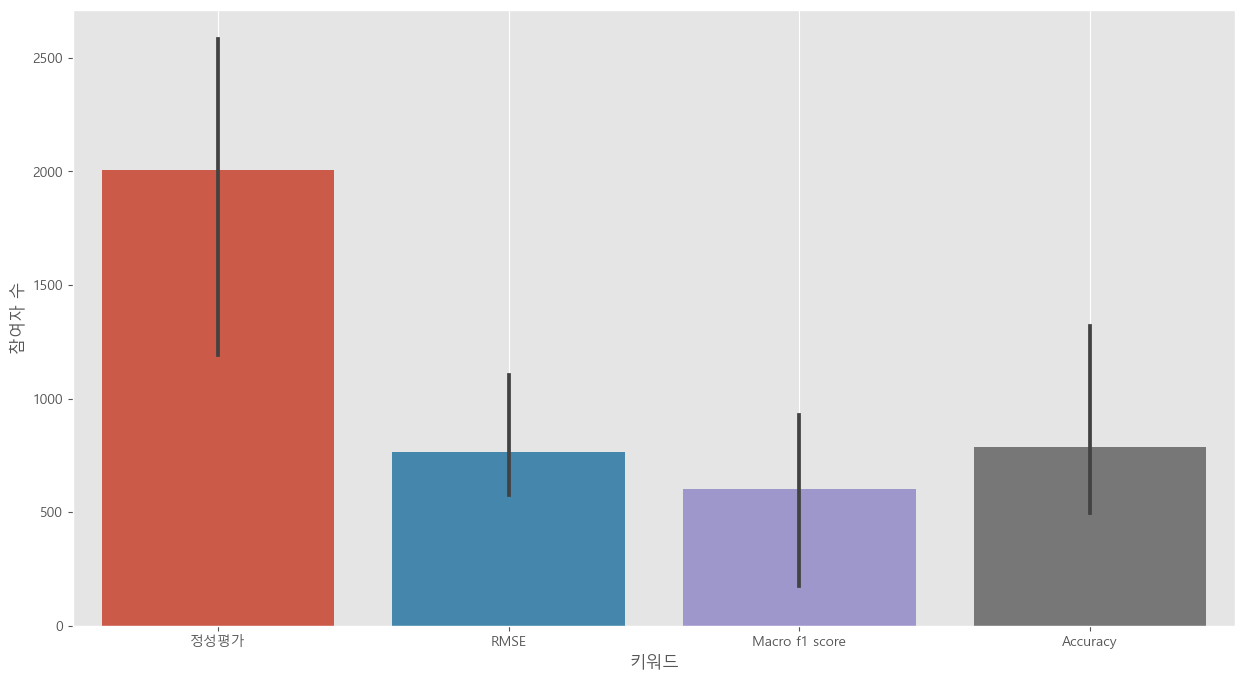


ANOVA


F_onewayResult(statistic=5.188036567742903, pvalue=0.027882878533346915)


t검정


TtestResult(statistic=2.7514216903963713, pvalue=0.0512994379947636, df=4.0)

TtestResult(statistic=2.9616474605879213, pvalue=0.04148653846204055, df=4.0)

TtestResult(statistic=2.456053201050159, pvalue=0.0699878618713227, df=4.0)

TtestResult(statistic=0.5777123762363362, pvalue=0.5944198637228122, df=4.0)

TtestResult(statistic=-0.0704455740617823, pvalue=0.9472203720972966, df=4.0)

TtestResult(statistic=-0.5288808482026496, pvalue=0.6248754345109313, df=4.0)

In [19]:
group_subjective = competition_info_df.loc[competition_info_df['키워드'].str.contains("정성평가"),:].head(3)
group_RMSE = competition_info_df.loc[competition_info_df['키워드'].str.contains("RMSE"),:].head(3)
group_f1 = competition_info_df.loc[competition_info_df['키워드'].str.contains("Macro f1 score"),:].head(3)
group_Accuracy = competition_info_df.loc[competition_info_df['키워드'].str.contains("Accuracy"),:].head(3)

group_subjective['키워드'] = '정성평가'
# display(group_subjective.head(5))
group_RMSE['키워드'] = 'RMSE'
# display(group_RMSE.head(5))
group_f1['키워드'] = 'Macro f1 score'
# display(group_f1.head(5))
group_Accuracy['키워드'] = 'Accuracy'
# display(group_Accuracy.head(5))

group_measure = pd.merge(group_subjective,group_RMSE ,how = 'outer')
# group_measure.head(5)
group_measure = pd.merge(group_measure,group_f1 ,how = 'outer')
# group_measure.head(5)
group_measure = pd.merge(group_measure,group_Accuracy ,how = 'outer')
# display(group_measure.head(5))


plt.figure(figsize = (15,8))
sns.barplot(x='키워드', y='참여자 수', data = group_measure)
plt.grid()
plt.show()

## 평균 분석 : ttest_ind

anova_subjective = group_measure.loc[group_measure['키워드']=='정성평가', '참여자 수']
anova_RMSE = group_measure.loc[group_measure['키워드']=='RMSE', '참여자 수']
anova_f1 = group_measure.loc[group_measure['키워드']=='Macro f1 score', '참여자 수']
anova_Accuracy = group_measure.loc[group_measure['키워드']=='Accuracy', '참여자 수']


print("\nANOVA")
display(spst.f_oneway(anova_subjective, anova_RMSE,anova_f1,anova_Accuracy  ))


print("\nt검정")
display(spst.ttest_ind(anova_subjective, anova_RMSE))
display(spst.ttest_ind(anova_subjective, anova_f1))
display(spst.ttest_ind(anova_subjective, anova_Accuracy))

display(spst.ttest_ind(anova_RMSE, anova_f1))
display(spst.ttest_ind(anova_RMSE, anova_Accuracy))

display(spst.ttest_ind(anova_f1, anova_Accuracy))

- ANOVA 검정 "정성평가", "RMSE", "Macro f1 score", "Accuracy"
    - pvalue = 0.027882878533346915
    - 집단 간에 유의미한 평규 참여자 수의 차이가 존재
- t 검정
    - 0.05 이상
        - < 정성평가-RMSE > TtestResult(statistic=2.7514216903963713, pvalue=0.0512994379947636, df=4.0)
        - < 정성평가-Accuracy > TtestResult(statistic=2.456053201050159, pvalue=0.0699878618713227, df=4.0)
        - < RMSE-Macro f1 score > TtestResult(statistic=0.5777123762363362, pvalue=0.5944198637228122, df=4.0)
        - < RMSE-Accuracy > TtestResult(statistic=-0.0704455740617823, pvalue=0.9472203720972966, df=4.0)
        - < Macro f1 score-Accuracy >TtestResult(statistic=-0.5288808482026496, pvalue=0.6248754345109313, df=4.0)
    
    - 0.05 미만
    
        - < 정성평가-Macro f1 Score > TtestResult(statistic=2.9616474605879213, pvalue=0.04148653846204055, df=4.0)
- 결론
    - 정성평가인 경우에 평균 참여자 수가 가장 많았다.
    - 정상평가인 경우와 Macro f1 score인 경우는 통계적으로도 유의미하게 평균 참여자 수의 차이가 존재했다.

### 4-(3) 참가 조건 여부, 연습 가능 여부에 따라 참여자 숫자의 차이가 존재하는가

In [20]:
competition_info_df.head(2)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,진행기간
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,...,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구...",30
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,...,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ...",74


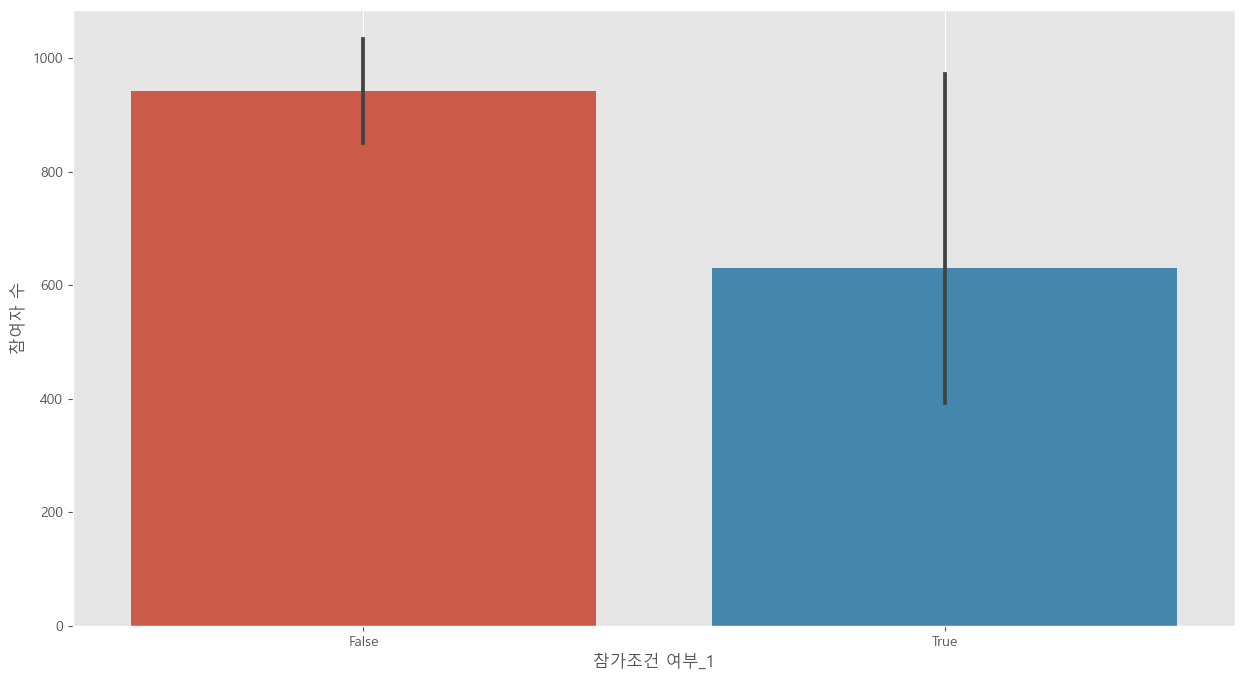

TtestResult(statistic=-1.0967406939274067, pvalue=0.27454816144415034, df=147.0)


In [21]:
get_cols = ['참가조건 여부', '연습가능 여부']
competition_info_df_condition = competition_info_df[['참가조건 여부', '연습가능 여부','참여자 수']]
dummies_df = pd.get_dummies(competition_info_df_condition, 
                            columns = get_cols, 
                            drop_first=True)

group1 = dummies_df[dummies_df['참가조건 여부_1'] == 1]['참여자 수']  # '참가조건 여부'가 Yes인 경우
group2 = dummies_df[dummies_df['참가조건 여부_1'] == 0]['참여자 수']  # '참가조건 여부'가 No인 경우

# t-검정 수행
t_test_result = spst.ttest_ind(group1, 
                               group2)

plt.figure(figsize = (15,8))
sns.barplot(x='참가조건 여부_1', 
            y='참여자 수', 
            data = dummies_df)
plt.grid()
plt.show()

# 결과 출력
print(t_test_result)

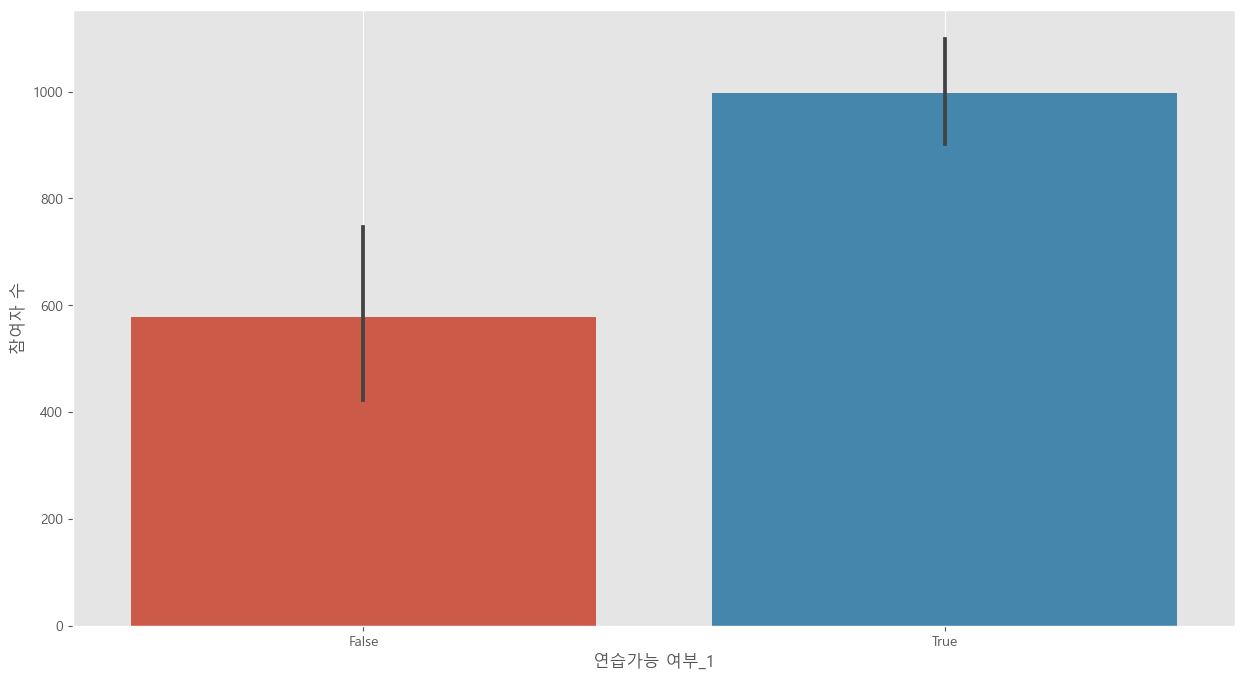

TtestResult(statistic=3.420154692606161, pvalue=0.0008103488091483713, df=147.0)


In [22]:
group1 = dummies_df[dummies_df['연습가능 여부_1'] == 1]['참여자 수']  # '참가조건 여부'가 Yes인 경우
group2 = dummies_df[dummies_df['연습가능 여부_1'] == 0]['참여자 수']  # '참가조건 여부'가 No인 경우

# t-검정 수행
t_test_result = spst.ttest_ind(group1, 
                               group2)

plt.figure(figsize = (15,8))
sns.barplot(x='연습가능 여부_1', 
            y='참여자 수', 
            data = dummies_df)
plt.grid()
plt.show()

# 결과 출력
print(t_test_result)

- 참가조건 여부는 통계적으로 유의미할 정도로 평균 참여자 수의 차이가 존재하지는 않았다.<br>
TtestResult(statistic=-1.0967406939274067, pvalue=0.27454816144415034, df=147.0)

- 연습가능 여부는 통계적으로 유의미할 정도로 평균 참여자 수의 차이가 존재했다.<br>
TtestResult(statistic=3.420154692606161, pvalue=0.0008103488091483713, df=147.0)

----
- 평균 참여자 수에서 유의미한 통계적 차이 존재한다.
    - "정성평가"와 "Macro f1 score"
    - "연습가능 여부"
---
- 평균 참여자 수에서 유의미한 통계적 차이 존재하지 않는다.
    - "회귀"와 "분류"
    - "정성평가"와 "RMSE"
    - "정성평가"와 "Accuracy"
    - "RMSE"와 "Macro f1 score"
    - "RMSE"와 "Accuracy"
    - "Macro f1 socre"와 "Accuracy"
    - "참가조건 여부"

## 5. 군집분석


### 5-(1) codeshare_log_df

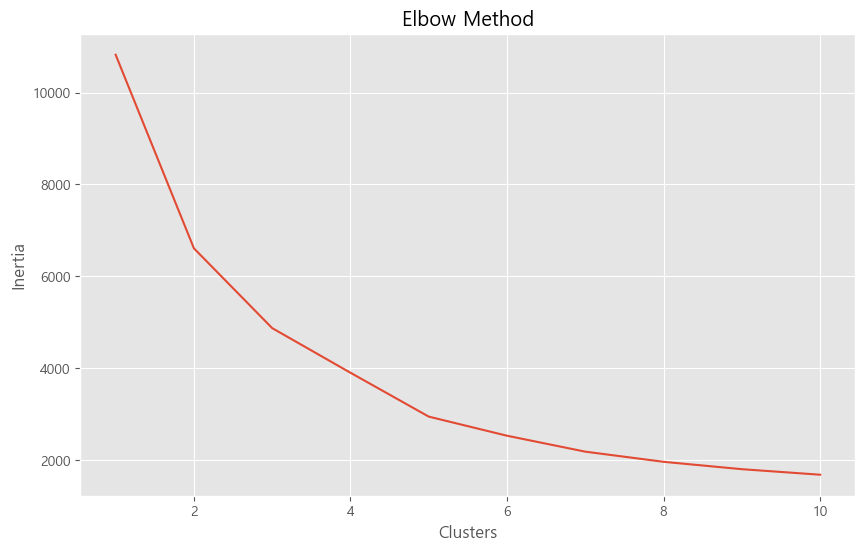

In [23]:
# Elbow Method 시각화
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 사용 할 features
features = ['코드 공유 수', '댓글 수', '조회 수', '공유 수', '다운로드 수', '좋아요 수']
X = codeshare_log_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

plt.show()

In [24]:
# 적절한 k는?
model = KMeans(n_clusters=5, n_init='auto', random_state=10)
model.fit(X_scaled)

KMeans(n_clusters=5, n_init='auto', random_state=10)

In [25]:
# 예측 
pred = model.predict(X_scaled) 
# 예측 결과를 데이터프레임으로 만들고 
pred = pd.DataFrame(pred, columns = ['pred']) 
# 원본 데이터와 합치기 
result = pd.concat([codeshare_log_df, pred], axis = 1)
# 예측 결과는 카테고리 타입으로 변경 
result['pred'] = pd.Categorical(result['pred']) 
result.head(10)

result[result['pred']==0].head(5)

,ID,일자,코드 공유 수,댓글 수,조회 수,공유 수,다운로드 수,좋아요 수,pred
867,ID_063,2021-08-12,19,26,104176,35,576,236,0
868,ID_063,2021-08-15,20,26,109058,35,594,241,0
1041,ID_081,2021-11-23,6,27,40983,13,456,115,0
1042,ID_081,2021-12-08,7,30,43537,13,471,119,0
1043,ID_081,2021-12-09,11,44,60187,17,603,170,0


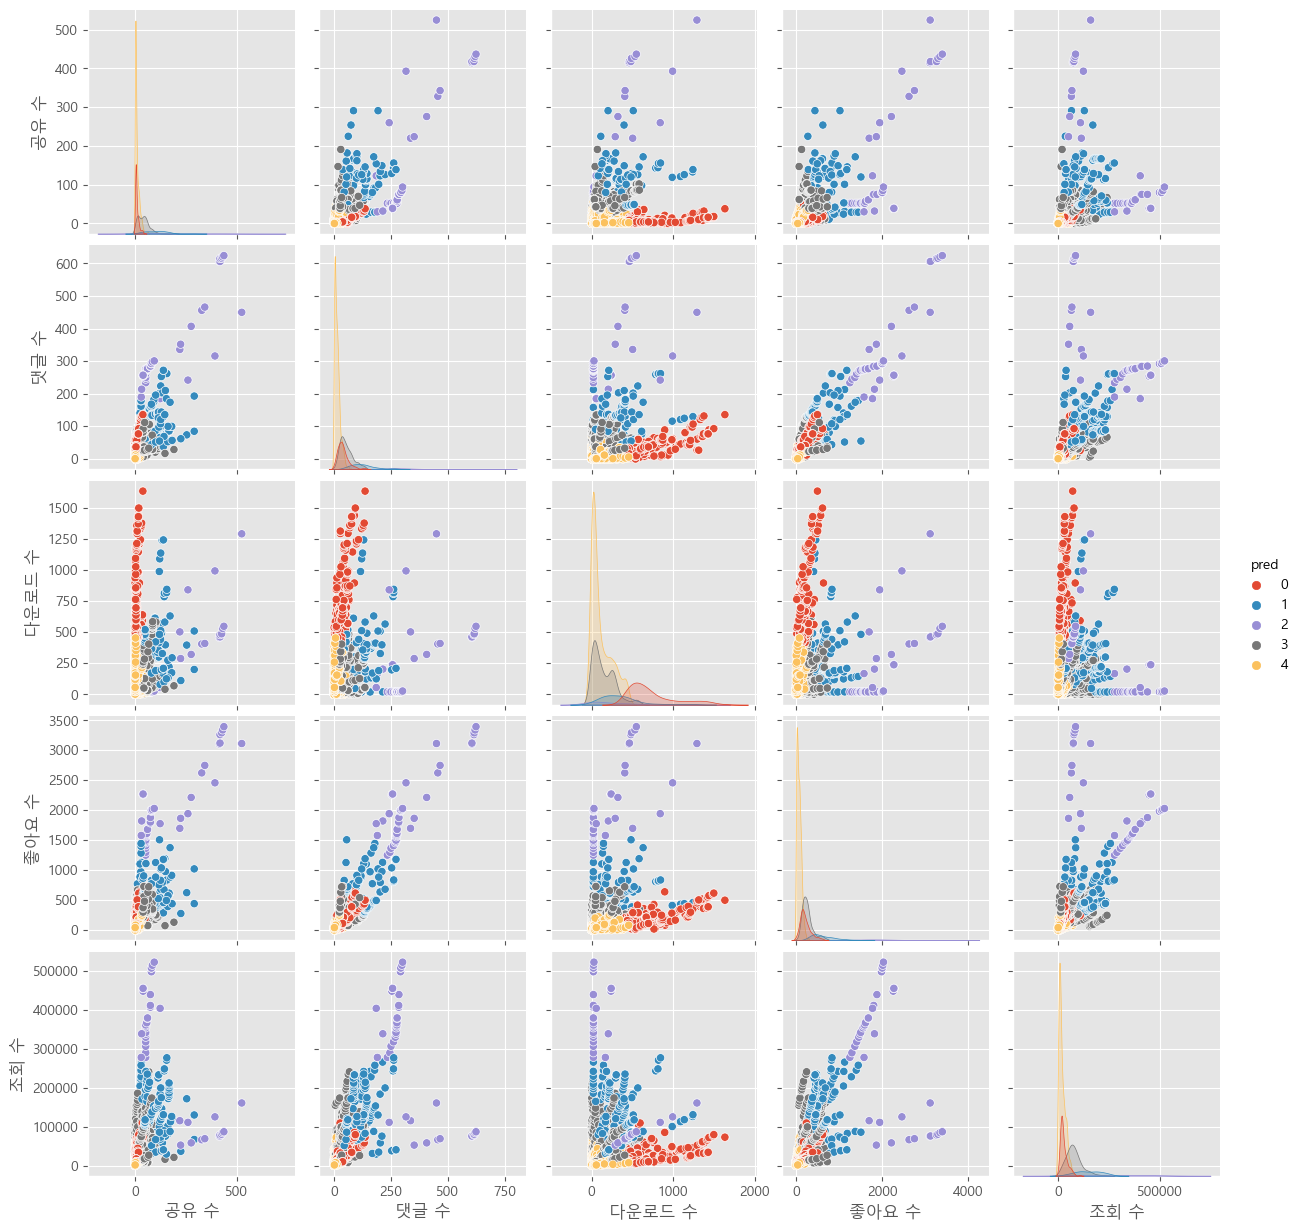

In [26]:
temp = result[['공유 수', '댓글 수', '다운로드 수','좋아요 수','조회 수','pred']]
sns.pairplot(temp, hue='pred')
plt.show()

### 5-(1) codeshare_log_df 군집 결론
- 좋아요 0 ~ 약 800, 조회 수 0 ~ 약 20,000 구간에서 군집을 이룬다.

### 5-(2) competition_info_df

In [27]:
competition_info_df.head(5)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,진행기간
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,...,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구...",30
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,...,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ...",74
2,ID_002,KBO 타자 OPS 예측 경진대회,알고리즘 | 정형 | 회귀 | 스포츠 | WRMSE,2019-02-08,2019-07-18,1103,800만원,5.0,3,3.0,...,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>KBO 타자 OP...,"<p>약 350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공...",<h2>세부 일정</h2><p><br></p><ul><li>대회 공개 : 2019....,<p>? 총 상금 800만원</p><p><br></p><p>?1위 - 500만원</...,<h2>모델링 규칙</h2><p>\r\n각 참가자는 3월 31일까지 여러 submi...,160
3,ID_003,상점 신용카드 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 매출 | 회귀 | MAE,2019-07-11,2019-10-21,1416,200만원,5.0,3,100.0,...,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>상점 신용카드 매...,<p>1. funda_train.csv : 2019-02-28일까지의 상점별 카드 ...,<h2>세부 일정</h2><p>UTC+9 기준</p><p><br></p><ul><l...,<p>?7월 11일부터&nbsp;8월 30일까지 열렸던 대회에 대한 상금은 아래와 ...,<h2>단계별 방식 랭킹\r\n</h2><p><br></p><p> A. publ...,102
4,ID_004,전력 수요량 예측 경진대회,알고리즘 | 정형 | 회귀 | 공공 | SMAPE,2019-10-01,2019-10-27,789,600만원,4.0,3,3.0,...,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>전력 수요량 예측...,<p>본 대회에서는 2016년 7월 20일부터 2018년 6월 30일까지의 국내 특...,<h2>세부 일정 </h2><p>UTC+ 9 기준</p><p><br></p><ul>...,<p><strong>데이터 사이언스 콘테스트 부문</strong></p><p>?1등...,<p><br></p><p>SMAPE는 Symmetric Mean Absolute P...,26


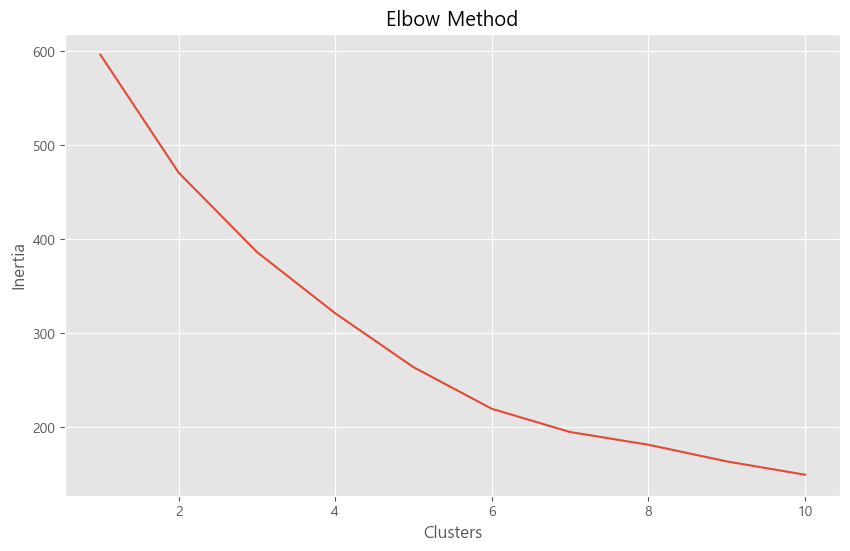

In [28]:
# Elbow Method 시각화
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 사용 할 features
features = ['참여자 수', '최대 팀원 수', '수상자 수', '진행기간']
X = competition_info_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

plt.show()

In [29]:
# 적절한 k는?
model = KMeans(n_clusters=6, n_init='auto', random_state=10)
model.fit(X_scaled)

KMeans(n_clusters=6, n_init='auto', random_state=10)

In [30]:
# 예측 
pred = model.predict(X_scaled) 
# 예측 결과를 데이터프레임으로 만들고 
pred = pd.DataFrame(pred, columns = ['pred']) 
# 원본 데이터와 합치기 
result = pd.concat([competition_info_df, pred], axis = 1)
# 예측 결과는 카테고리 타입으로 변경 
result['pred'] = pd.Categorical(result['pred']) 
result.head(10)

result[result['pred']==1].head(5)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,진행기간,pred
17,ID_017,월간 데이콘 생체 광학 데이터 분석 AI 경진대회,알고리즘 | 정형 | 회귀 | 바이오 | MAE,2020-05-15,2020-06-26,932,NaN,3.0,10,10.0,...,1,0,1,<h2><strong>1. 배경 </strong></h2><p><span style...,"<p><span class=""ql-size-large"">2020-05-15 23:3...",<p><strong>세부일정&nbsp;</strong></p><ul><li>제출 기...,"<p><span style=""background-color: transparent;...",<p><strong>1. 평가</strong></p><p>평가 지표는&nbsp;Me...,42,1
24,ID_024,월간 데이콘 컴퓨터 비전 학습 경진대회,알고리즘 | CV | 분류 | 과학 | Accuracy,2020-08-03,2020-09-14,1321,NaN,3.0,10,3.0,...,1,0,1,"<h2>1.배경</h2><p><span style=""background-color:...","<p><span class=""ql-size-large"">- train.csv : 훈...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...",<p>일일 최대 제출 횟수 : 3회</p><p><br></p><p>팀 최대 인원 :...,42,1
28,ID_028,월간 데이콘 심리 성향 예측 AI 경진대회,알고리즘 | 정형 | 분류 | 심리 | AUC,2020-09-28,2020-11-16,2044,100만원+애플워치,3.0,11,3.0,...,1,0,1,"<p><strong class=""ql-size-large"">1.배경</strong>...",<ul><li>데이터 출처: openpsychometrics.org</li></ul...,<ul><li>대회 기간 : 2020년&nbsp;09월&nbsp;28일&nbsp;1...,"<p><span style=""background-color: transparent;...",<h1><strong>규칙</strong></h1><p><br></p><p><str...,49,1
33,ID_033,월간 데이콘 소설 작가 분류 AI 경진대회,알고리즘 | NLP | 분류 | 자연어 | LogLoss,2020-10-29,2020-12-04,1306,100만원+애플워치,10.0,11,3.0,...,1,0,1,"<h2>1.배경</h2><p><span style=""background-color:...",<p><strong>A. 데이터 모양</strong></p><p>&nbsp;- tr...,<p>- 대회 기간 : 2020년&nbsp;10월&nbsp;29일&nbsp;12:0...,"<p><br></p><p><span style=""background-color: t...",<h1><strong>규칙</strong></h1><p><br></p><p><str...,36,1
42,ID_042,월간 데이콘 2020 D CUP Google Analytics 데이터 경진대회,알고리즘 | 정형 | 회귀 | 행태심리 | RMSE,2020-12-18,2021-01-22,576,총 100만원 + 데이콘 기념품,3.0,10,3.0,...,0,0,1,"<p class=""ql-align-justify""><strong style=""col...","<p><br></p><p><br></p><p class=""ql-indent-1"">-...","<p><strong class=""ql-size-large"">세부일정</strong>...","<p><span style=""background-color: transparent;...",<h1><strong>규칙</strong></h1><p><br></p><p><br>...,35,1


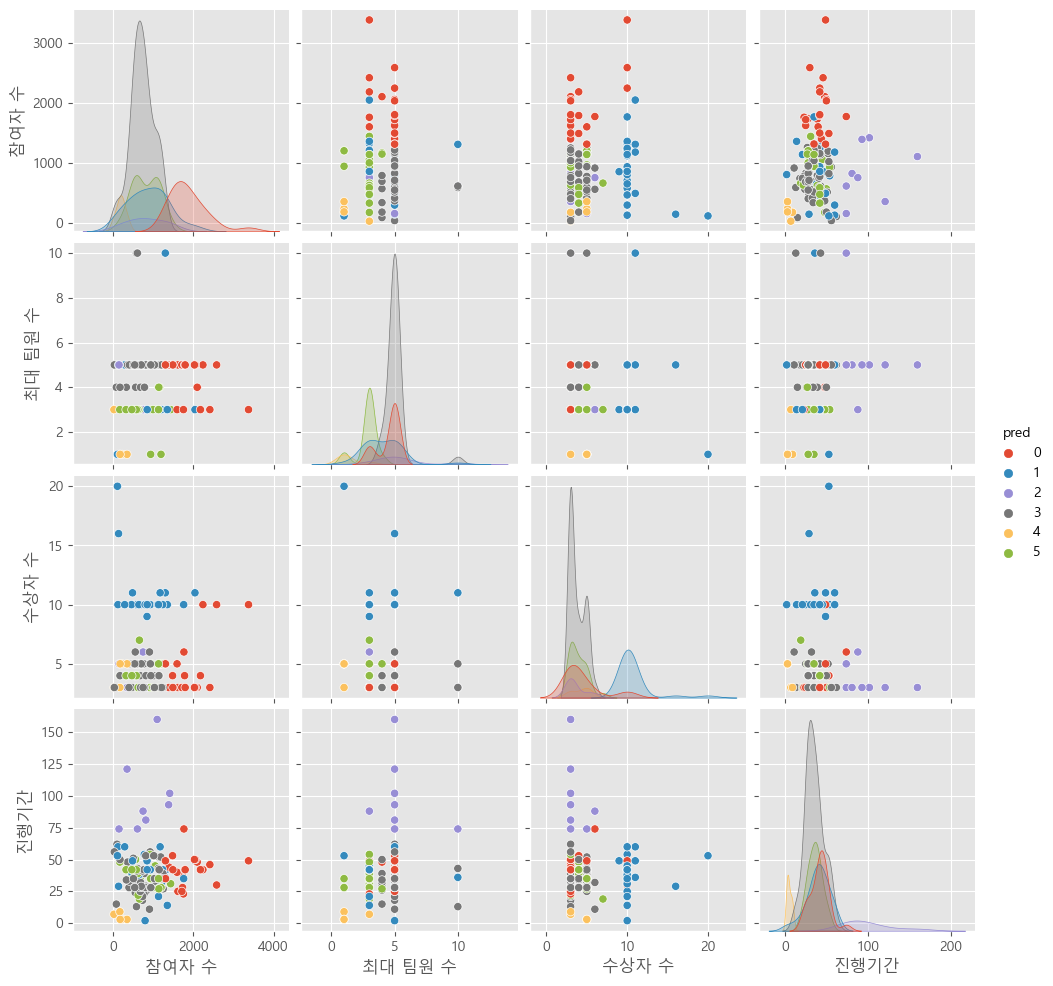

In [31]:
temp = result[['참여자 수', '최대 팀원 수', '수상자 수', '진행기간','pred']]
sns.pairplot(temp, hue='pred')
plt.show()

### 5-(2) competition_info_df 결론
- 진행기간 약 20 ~ 약 60, 참여자 수 0 ~ 약 2,000에서 군집을 이룬다.

In [32]:
talk_log_df.head(5)

,토크 수,댓글 수,조회 수,공유 수,좋아요 수,월별
0,1,1,2324,0,5,2018-08
1,2,2,4729,0,9,2018-08
2,5,5,9475,0,14,2018-08
3,6,6,11862,0,18,2018-08
4,11,11,22621,0,34,2018-08


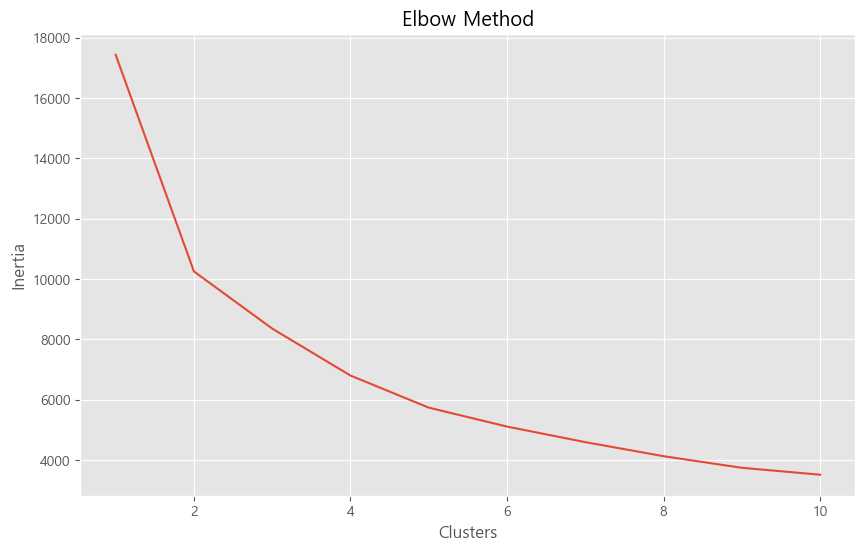

In [33]:
# Elbow Method 시각화
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 사용 할 features
features = ['토크 수', '댓글 수', '조회 수', '공유 수', '좋아요 수']
X = talk_log_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

plt.show()

In [34]:
# 적절한 k는?
model = KMeans(n_clusters=4, n_init='auto', random_state=10)
model.fit(X_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=10)

In [35]:
# 예측 
pred = model.predict(X_scaled) 
# 예측 결과를 데이터프레임으로 만들고 
pred = pd.DataFrame(pred, columns = ['pred']) 
# 원본 데이터와 합치기 
result = pd.concat([talk_log_df, pred], axis = 1)
# 예측 결과는 카테고리 타입으로 변경 
result['pred'] = pd.Categorical(result['pred']) 
result.head(10)

result[result['pred']==1].head(5)

,토크 수,댓글 수,조회 수,공유 수,좋아요 수,월별,pred
16,29,29,59616,0,82,2018-09,1
17,34,34,77344,0,103,2018-09,1
18,35,34,80993,0,106,2020-02,1
19,36,34,80997,0,106,2020-02,1
39,23,23,65747,2,78,2019-03,1


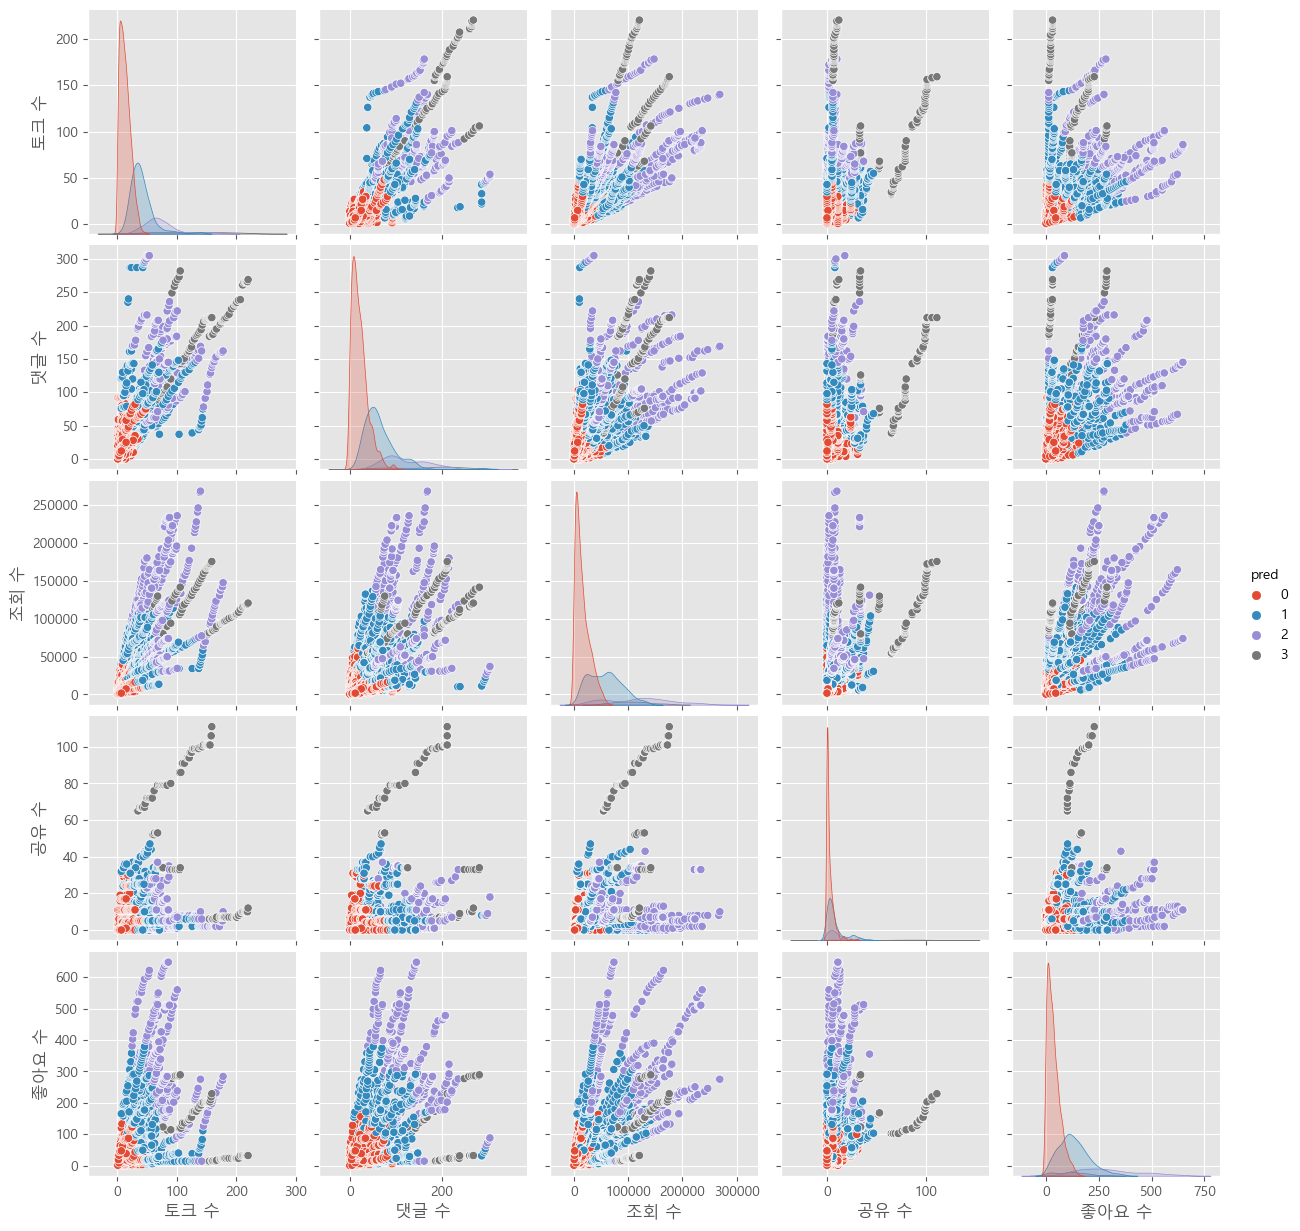

In [36]:
temp = result[['토크 수', '댓글 수', '조회 수', '공유 수', '좋아요 수','pred']]
sns.pairplot(temp, hue='pred')
plt.show()

- 조회수 약 0 ~ 50,000 토크 수 0 ~ 약 80에서 군집을 이루었다.

## 5. 최종 결론

참여자 수는 어떤 요인에 의해 영향을 받는가?
- 대회의 평가 방식 중에서는 "정성평가"인 경우에 평균 참여자 수가 많았고, 특히 "정성평가"는 "Macro f1 score"와 통계적으로도 유의미한 평균 참여자 수의 차이가 있었다.
- "일일 제출 횟수"는 평균 참여자 수에 영향을 주었다.
- "연습가능 여부"는 평균 참여자 수에 영향을 주었다.

참여자 수는 대회에 어떤 영향을 주는가?
- 참여자 수는 게시판의 "댓글 수", "좋아요 수"에 영향을 준다.

결론
- "대회의 평가방식", "일일 제출 횟수", "연습가능 여부"를 고려한다면 더 많은 참여자 수를 이끌어낼 수 있을 것이다.
- 더 많은 참여자 수는 게시판의 "댓글 수", "좋아요 수"에 긍정적 영향을 주며 토론 활성도를 높일 수 있을 것이다.

군집 분석
- codeshare_log_df 경우, 좋아요 0 ~ 약 800, 조회 수 0 ~ 약 20,000 구간에서 군집을 이루었다.
- competition_info_df 경우, 진행기간 약 20 ~ 약 60, 참여자 수 0 ~ 약 2,000에서 군집을 이룬다.
- talk_log_df 경우, 조회수 약 0 ~ 50,000 토크 수 0 ~ 약 80에서 군집을 이루었다.